# Introduction 03_FPHDP_KNNImputationSelective_LR


 We have explored logistic regression and different imputation methods in 01- and 02-FPHDP. In this 03-Final Project Heart Disease Prediction will look once more at Logisitic Regression using a selective KNN Imputation on some numeric columns and Simple Imputer on the remaining numeric features.


### Import Libraries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


np.random.seed(42)

In [ ]:
#Pandas dataframe
heart = pd.read_csv("/content/heart.csv")

In [ ]:
#https://www.youtube.com/watch?v=JR92LxKgMBE
numeric_features = heart.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [ ]:
categorical_features = heart.select_dtypes(include=[object])
categorical_features.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
#X = heart.loc[:, :'ST_Slope']
X= heart.drop('HeartDisease', axis=1)
#y = heart.HeartDisease
y = heart['HeartDisease']

In [ ]:
X.shape


(918, 11)

In [ ]:
y.shape

(918,)

In [ ]:
# Verifying X has the features I expect
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
missingvalue = ['RestingBP', 'Cholesterol']
mvtransformer = Pipeline(
    steps=[("imputer", KNNImputer(missing_values=0, n_neighbors=5)), ("scaler", StandardScaler())]
)

numregular = ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']
numregulartransformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nummv", mvtransformer, missingvalue),
        ("numreg", numregulartransformer, numregular),
        ("cat", categorical_transformer, categorical_features),
    ],
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have a balanced response values within test set and
# training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf.score(X_test, y_test))

Accuracy on training data : 0.8596730245231607
model score on test set: 0.891


Since the accuracy scores on the training data and the test set are relatively close I am not concerned about overfitting, especially since the test set accuracy is higher than that of the training set.

'Grid search can also be performed on the different preprocessing steps defined in the ColumnTransformer object, together with the classifier's hyperparameters as part of the Pipeline. We will search for both the imputer strategy of the numeric preprocessing and the regularization parameter of the logistic regression using :class:~sklearn.model_selection.GridSearchCV.'

param_grid = A sequence of dicts signifies a sequence of grids to search, and is useful to avoid exploring parameter combinations that make no sense or have no effect.
It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use: estimator.get_params()

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:


In [ ]:
param_grid = {
    'preprocessor__nummv__imputer__n_neighbors':[2,3,5,10],'preprocessor__numreg__imputer__strategy':["mean", "median"],
    'classifier__C': [0.1, 1.0, 10, 100]}



grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nummv',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(missing_values=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['RestingBP',
                                                                          'Cholesterol']),
                                                                        ('numreg',
                                                                         Pipeline(steps=[('imputer',
                                               

In [ ]:
grid_search.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__nummv', 'preprocessor__numreg', 'preprocessor__cat', 'preprocessor__nummv__memory', 'preprocessor__nummv__steps', 'preprocessor__nummv__verbose', 'preprocessor__nummv__imputer', 'preprocessor__nummv__scaler', 'preprocessor__nummv__imputer__add_indicator', 'preprocessor__nummv__imputer__copy', 'preprocessor__nummv__imputer__metric', 'preprocessor__nummv__imputer__missing_values', 'preprocessor__nummv__imputer__n_neighbors', 'preprocessor__nummv__imputer__weights', 'preprocessor__nummv__scaler__copy', 'preprocessor__nummv__scaler__with_mean', 'preprocessor__nummv__scaler__with_std', 'preprocessor__numreg__memory', 'preprocessor__numreg__steps', 'preprocessor__numreg__verbose', 'preproces

If you use a pipeline as the estimator in a grid search, you need to use a special syntax when specifying the parameter grid. Specifically, you need to use the step name followed by a double underscore, followed by the parameter name as you would pass it to the estimator. I.e.

'<named_step>__<parameter>': value

here is an attribute that shows these steps as a dictionary:

svp.named_steps

https://stackoverflow.com/questions/48726695/error-when-using-scikit-learn-to-use-pipelines

and

If you have a pipeline or a pipeline of pipelines, the name is the names of all its parents combined with a double underscore. So for your case, it looks like

gird = {
    "preprocess__num__simpleimputer__strategy":['median']
}

https://stackoverflow.com/questions/70873560/trouble-changing-imputer-strategy-in-scikit-learn-pipeline

In [ ]:
clf.named_steps

{'classifier': LogisticRegression(),
 'preprocessor': ColumnTransformer(transformers=[('nummv',
                                  Pipeline(steps=[('imputer',
                                                   KNNImputer(missing_values=0)),
                                                  ('scaler', StandardScaler())]),
                                  ['RestingBP', 'Cholesterol']),
                                 ('numreg',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['Sex', 'ChestPainType', 'RestingECG',
                                   'ExerciseAngina', 'ST_Slope'])])}

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__nummv__imputer__n_neighbors': 2, 'preprocessor__numreg__imputer__strategy': 'mean'}


'The internal cross-validation scores obtained by those parameters is:'

In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.858


'We can also introspect the top grid search results as a pandas dataframe:'

In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_preprocessor__nummv__imputer__n_neighbors,param_preprocessor__numreg__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083222,0.022268,0.028144,0.008942,0.1,2,mean,"{'classifier__C': 0.1, 'preprocessor__nummv__i...",0.905405,0.905405,...,0.891892,0.876712,0.821918,0.849315,0.876712,0.808219,0.821918,0.858182,0.035545,1
1,0.117225,0.042057,0.032197,0.015351,0.1,2,median,"{'classifier__C': 0.1, 'preprocessor__nummv__i...",0.905405,0.905405,...,0.891892,0.876712,0.821918,0.849315,0.876712,0.808219,0.821918,0.858182,0.035545,1
2,0.125490,0.028322,0.046991,0.014768,0.1,3,mean,"{'classifier__C': 0.1, 'preprocessor__nummv__i...",0.891892,0.905405,...,0.891892,0.876712,0.821918,0.849315,0.876712,0.808219,0.821918,0.856831,0.033945,3
3,0.121598,0.034244,0.034388,0.014112,0.1,3,median,"{'classifier__C': 0.1, 'preprocessor__nummv__i...",0.891892,0.905405,...,0.891892,0.876712,0.821918,0.849315,0.876712,0.808219,0.821918,0.856831,0.033945,3
4,0.089930,0.024780,0.035738,0.014709,0.1,5,mean,"{'classifier__C': 0.1, 'preprocessor__nummv__i...",0.878378,0.905405,...,0.891892,0.876712,0.821918,0.849315,0.876712,0.808219,0.821918,0.855479,0.032771,5


'The best hyper-parameters have been used to re-fit a final model on the full training set. We can evaluate that final model on held out test data that was not used for hyperparameter tuning.'

In [ ]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best logistic regression from grid search: 0.891


**https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py**

Above code and text can be found in the link to the Column Transformer example in Sci-Kit Learn.

In [ ]:
heartdisease_y_pred = clf.predict(X_test)
heartdisease_y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1])

The GridSearchCV object itself doesn't have a coefficient, because it's not an estimator, it's an object that cycles through parameters and trains various estimators.
https://stackoverflow.com/questions/62776587/python-gridsearchcv-object-has-no-attribute-coef

In [ ]:
y_test.shape



(184,)

In [ ]:
heartdisease_y_pred.shape

(184,)

In [ ]:
# Both arguments require the same number of samples
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, heartdisease_y_pred)

array([[71, 11],
       [ 9, 93]])

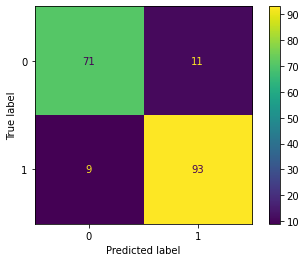

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, heartdisease_y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#TN | FP
#FN | TP

#Even though the L-to-R diagonal is high valued, is it acceptable to have 7
#false negatives when it means failure to diagnose a real case of heart disease?

In [ ]:
accuracy_score(y_test, heartdisease_y_pred) # Classification accuracy = (TP + TN)/(TP + TN + FP + FN)

0.8913043478260869

In [ ]:
1-accuracy_score(y_test, heartdisease_y_pred) #Classification error = (FP + FN)/(TP + TN + FP + FN)

0.10869565217391308

Specificity: when the actual value is negative how often is the prediction correct?   TN/(TN+FP)  
71/(71+11) = 0.865854

False Positive Rate: when the actual value is negative, how often is the prediction incorrect? FP/(TN+FP) = 11/(71+11) = 0.134146

(1 - Specificity)

In [ ]:
#Precision when a positive value is predicted, how often is the prediciton correct? TP/TP + FP
precision_score(y_test, heartdisease_y_pred)

0.8942307692307693

The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve:
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

**RocCurveDisplay**

0.9336441893830703


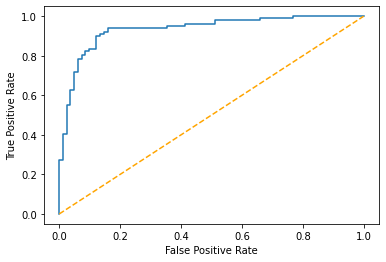

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = clf.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
print(roc_auc)

ROC curves typically feature true positive rate (Sensitivity; recall; probability of detection) on the Y axis, and false positive rate (1-Specificity; the probability of false alarm) on the X axis, for all possible classificaton thresholds ranging from 0 to 1. This is the advantage: ROC curve visualizes all possible classification thresholds. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate. ROC curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=area%20under%20curve

The following is courtesy of Data School's https://www.youtube.com/watch?v=OAl6eAyP-yo
True Positive Rate = true positives / all positives
When the actual classification is positive (Heart Disease in this case), how often does the classifier predict positive? Range [0, 1]

False Positive Rate = false positives / all negatives
When the actual classification is negative (no Heart Disease in this case), how often does the classifier incorrectly predict positive? Range [0, 1]

ROC curves are useful even if your predicted probabilities are not properly calibrated from 0 to 1. What matters is how well the classifier separated the two classes. AUC represents the the probability that a classifier will rank a randomly choesn positive observation higher than a randomly chosen negative observation; AUC is a useful metric even when classes are highly unbalanced.

ROC curves can be extended to problems with three or more classes using a One-Versus-All approach.

Choosing a classification threshold depends on whether you want to minimize FPR or maximize TPR. A low threshhold may result in a lot of False Positives but may be considered desireable if the goal is to collect all true positives and minimize a case where a real instance is misclassified. The ROC course will help you understand the impact of your choice of threshhold.

Here is a link to understan the ROC curve, pointed out by Data School:
http://www.navan.name/roc/


In [ ]:
roc_auc_score(y_test, heartdisease_y_pred)

0.8888091822094691

**PrecisionRecallDisplay**

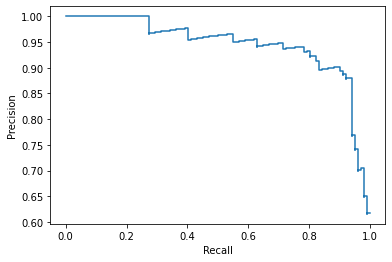

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, **precision** is a measure of result relevancy (**out of all predictions**, how many were correctly classified for the given class; TP/(TP+FP), while **recall** (truth as baseline; **out of all actual positives for the given class**, how many were correctly classified; TP/(TP+FN)) is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision-recall curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

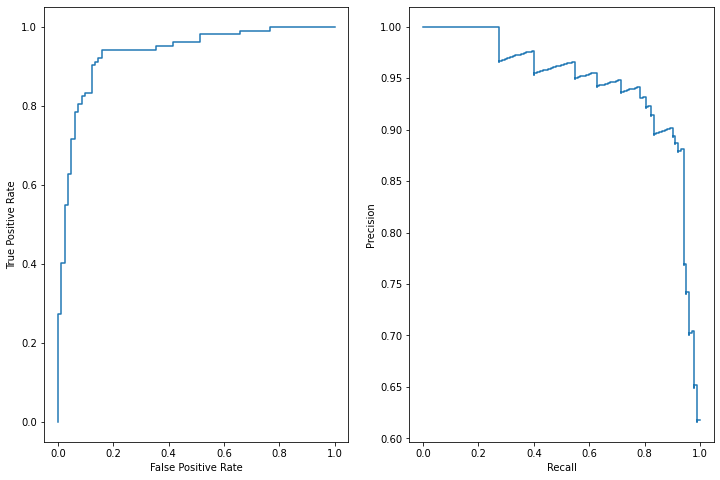

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

**Build a predictive system, courtesy https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan** and https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/

In [ ]:
#array
cols = ['Age', 'Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak' , 'ST_Slope']

# copy/paste just instance values into first array; include parentheses around string
df = pd.DataFrame([[32,'M','ATA',125,254,0,'Normal',155,'N',0,'Up']], columns = cols)
prediction = clf.predict(df)

print(prediction)

if prediction[0]==0 :
  print('This patient does not have heart disease')
else:
  print('This patient has heart disease')



[0]
This patient does not have heart disease
